In [51]:
from PIL import Image
import os, os.path
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import numpy as np
import torch.nn as nn
import torch.nn.functional as F


### Loading Images Data

In [52]:
imgs = []
path = "Data/Run_2/"
valid_images = ['.png']
print("Cheking files names to ensure linear increase")
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    print(f)
    
    imgs.append(Image.open(os.path.join(path,f)))


Cheking files names to ensure linear increase
001.png
002.png
003.png
004.png
005.png
006.png
007.png
008.png
009.png
010.png
011.png
012.png
013.png
014.png
015.png
016.png
017.png
018.png
019.png
020.png
021.png
022.png
023.png
024.png
025.png
026.png
027.png
028.png
029.png
030.png
031.png
032.png
033.png
034.png
035.png
036.png
037.png
038.png
039.png
040.png
041.png
042.png
043.png
044.png
045.png
046.png
047.png
048.png
049.png
050.png
051.png
052.png
053.png
054.png
055.png


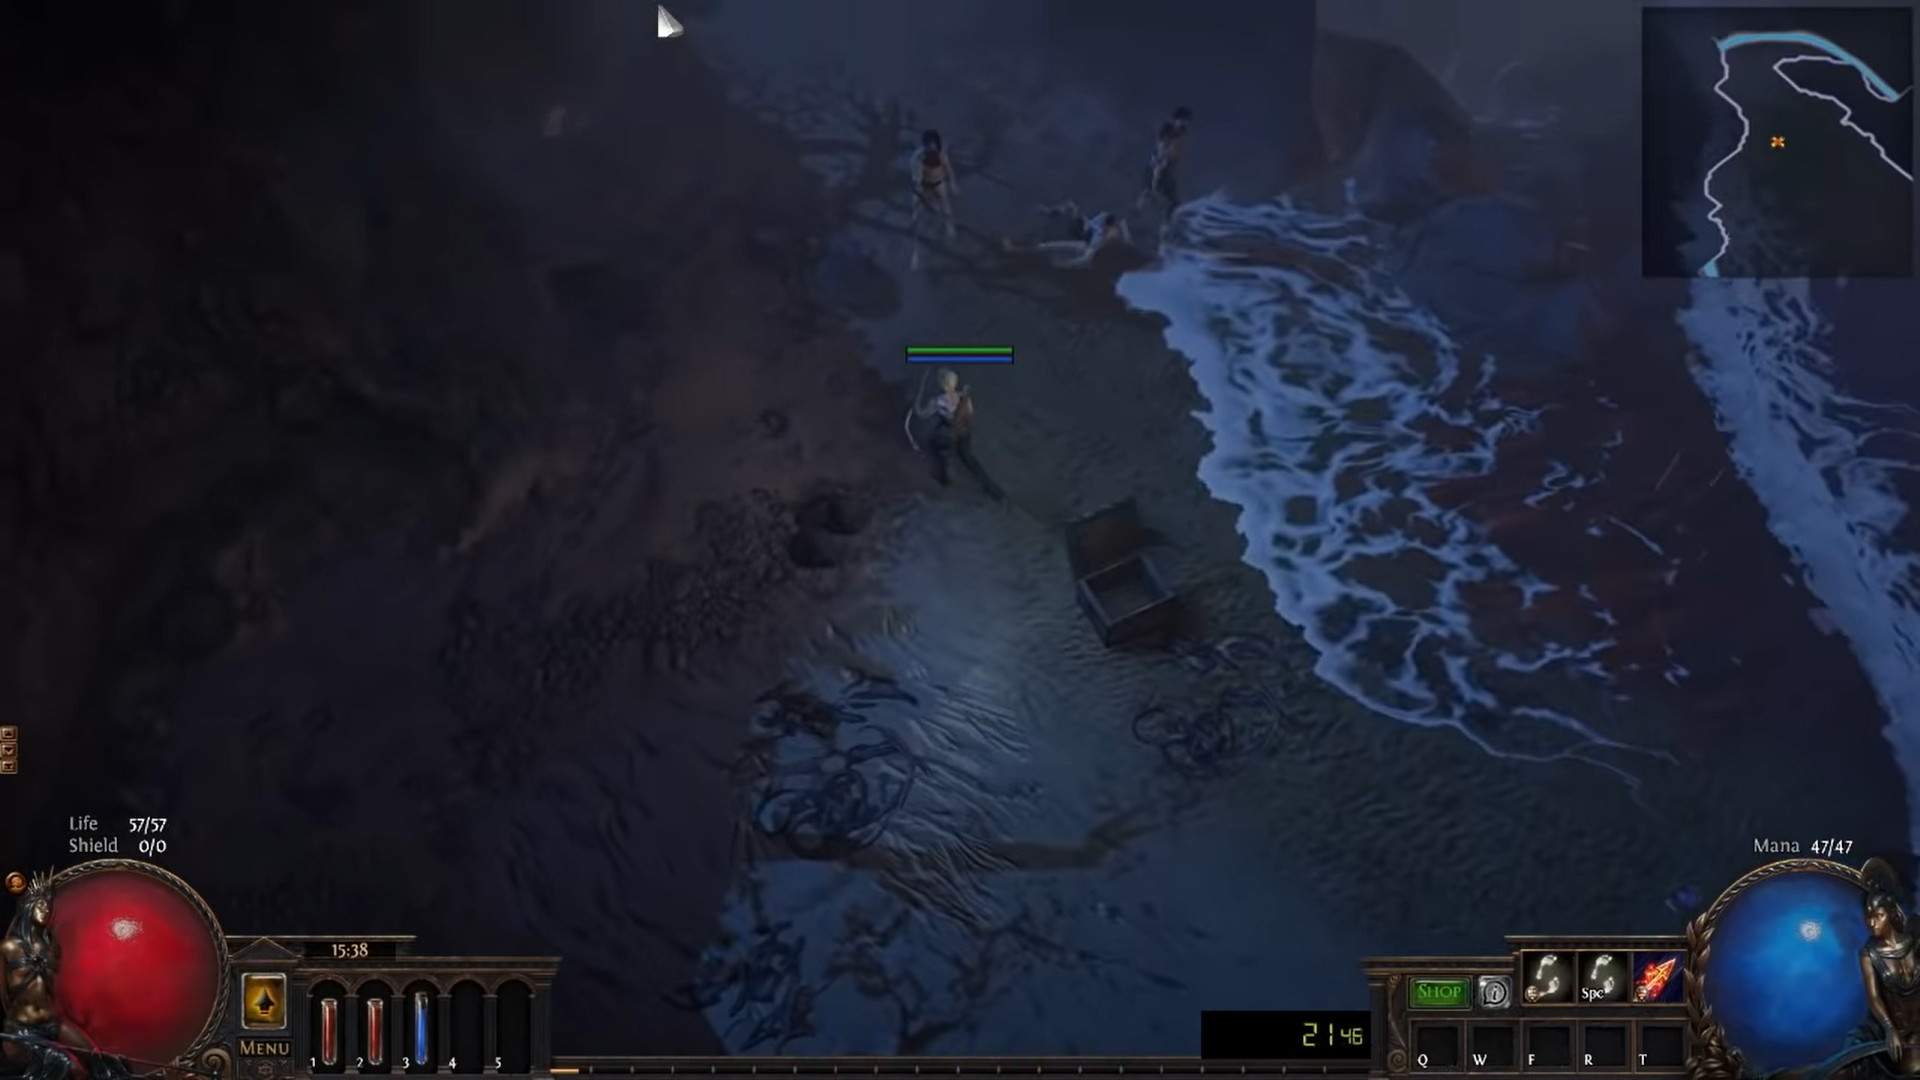

In [53]:
display(imgs[0])

In [54]:
#Converting PIL Images into NP array since PIL does not have torch.tensor suppot 
Values=[]
for image in imgs:
    Values.append(np.array(image))

### Loading Labels For image data

In [55]:
df=pd.read_excel('Data/Run_2/Data.xlsx')  
df.head()

Image  Class
0      1     90
1      2     45
2      3     45
3      4     45
4      5     45

In [56]:
labels=df["Class"]
#This represents the labels for the image data above 

### Example Pair

label says to travel in a 125 degree angle


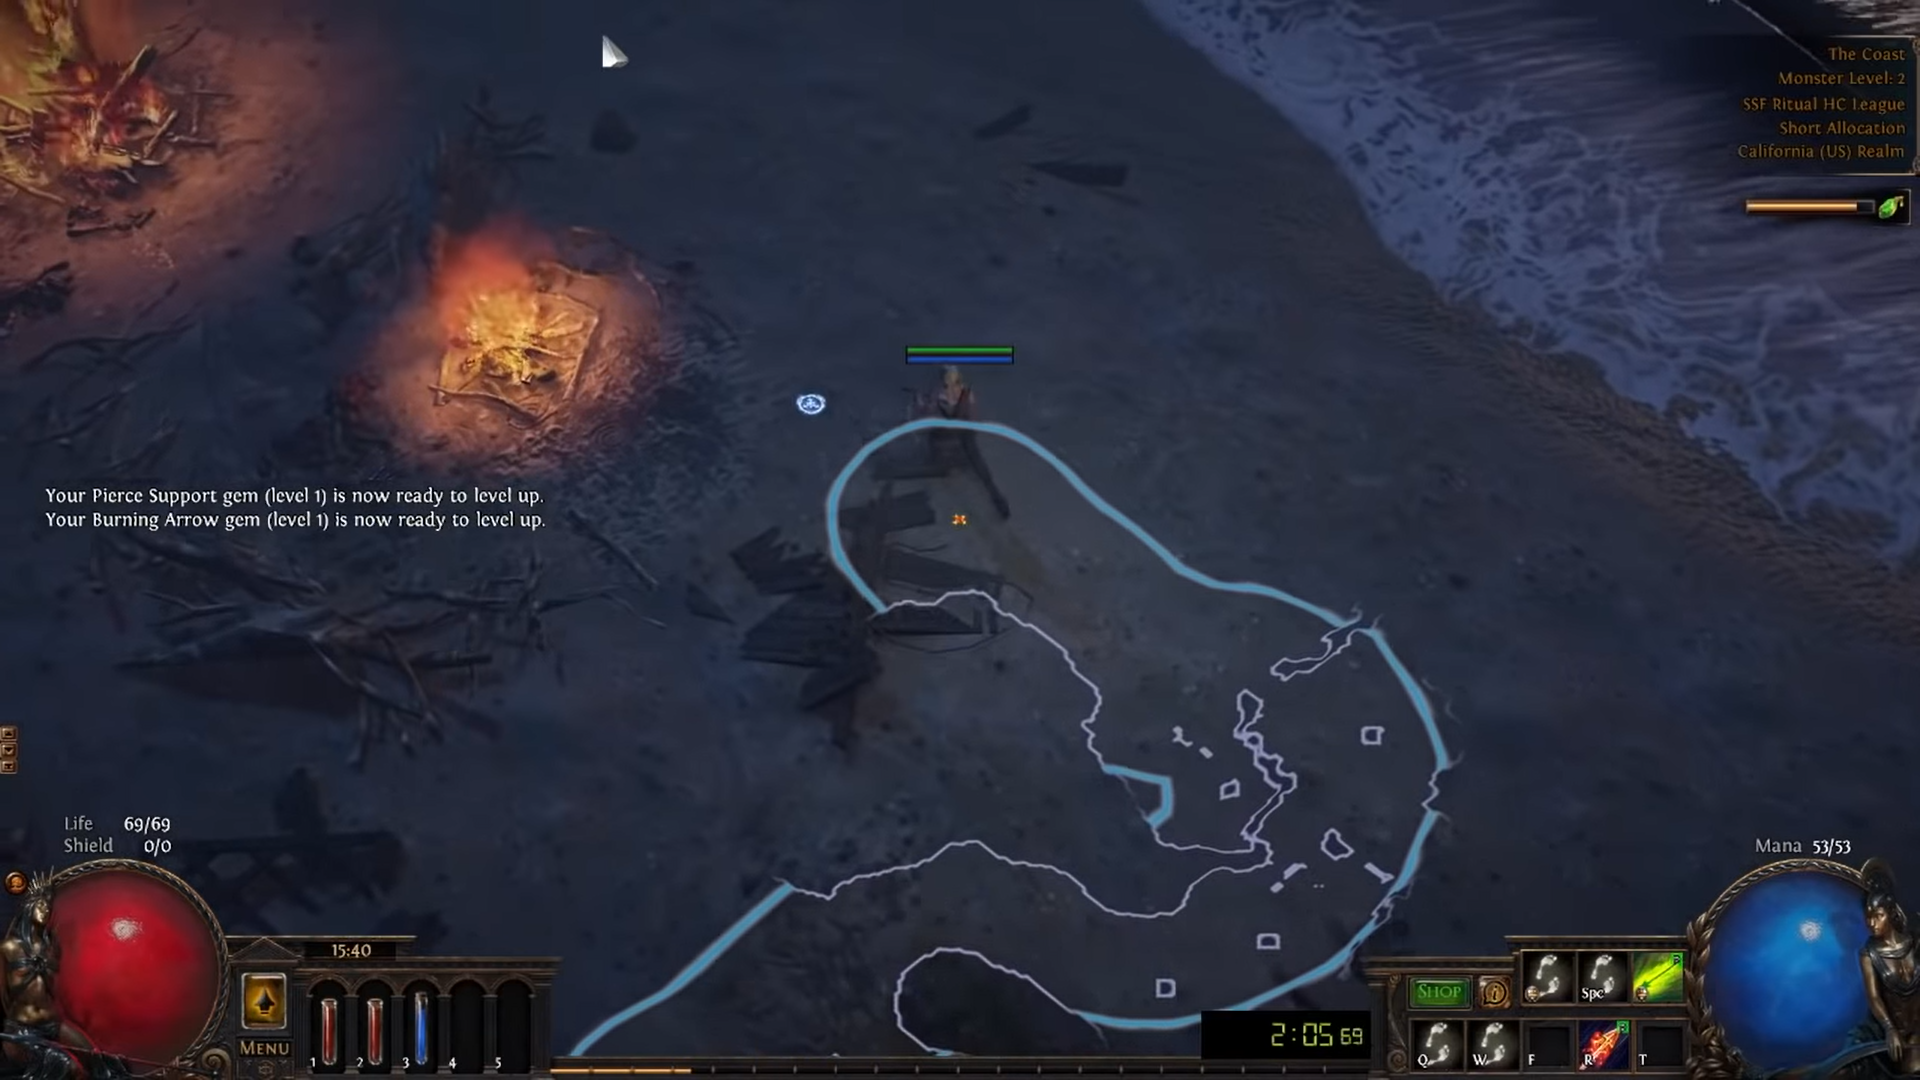

In [57]:
print("label says to travel in a "+str(labels[9])+" degree angle")
display(imgs[9])

### Declaring DataLoader


In [58]:
class POEPather(Dataset):
    x=[]
    y=[]
    def __init__(self,x_Set,y_set):
        self.x=x_Set
        self.y=y_set
    def __len__(self):
        return len(self.x)
    def __getitem__(self,idx):
        inputs=self.x[idx]
        outputs=self.y[idx]
        inputs=np.swapaxes(inputs,0,2)
        tensoredX=torch.tensor(inputs,dtype=torch.float)
        tensoredY=torch.tensor(outputs,dtype=torch.float)
        return(tensoredX,tensoredY)
        
    


In [59]:
DataSet=POEPather(Values,labels)

In [60]:
train_dataloader=DataLoader(DataSet,batch_size=1,shuffle=True)

In [61]:
#Example batch sample
test1=next(iter(train_dataloader))
print(test1)

[tensor([[[[16., 16., 16.,  ..., 15., 17., 17.],
          [16., 16., 16.,  ..., 13., 16., 16.],
          [16., 16., 16.,  ..., 12., 15., 16.],
          ...,
          [35., 35., 35.,  ..., 15.,  9., 14.],
          [35., 35., 35.,  ..., 14.,  9., 14.],
          [35., 35., 35.,  ..., 14.,  9., 14.]],

         [[21., 21., 21.,  ..., 17., 19., 19.],
          [21., 21., 21.,  ..., 15., 18., 19.],
          [21., 21., 21.,  ..., 14., 17., 18.],
          ...,
          [34., 34., 34.,  ..., 15.,  8., 13.],
          [34., 34., 34.,  ..., 14.,  8., 13.],
          [34., 34., 34.,  ..., 14.,  8., 13.]],

         [[34., 34., 34.,  ..., 18., 21., 21.],
          [34., 34., 34.,  ..., 17., 19., 20.],
          [34., 34., 34.,  ..., 16., 19., 20.],
          ...,
          [48., 48., 48.,  ..., 19., 13., 19.],
          [48., 48., 48.,  ..., 18., 13., 19.],
          [48., 48., 48.,  ..., 17., 13., 19.]]]]), tensor([90.])]


In [81]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 64, 5)
        self.conv4 = nn.Conv2d(64, 128, 5)
        self.conv5 = nn.Conv2d(128, 526, 5)
        self.conv6 = nn.Conv2d(526, 256, 5)
        self.conv7 = nn.Conv2d(256, 128, 5)
        self.fc1 = nn.Linear(5632, 2400)
        self.fc2 = nn.Linear(2400, 800)
        self.fc3 = nn.Linear(800, 200)
        self.fc3 = nn.Linear(200, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = self.pool(F.relu(self.conv6(x)))
        x = self.pool(F.relu(self.conv7(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Classifier()


In [82]:
net.forward(test1[0])

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x5632 and 2037744x120)